In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('electricity-consumptions.csv')

In [5]:
df.head()

,home_size,kilowatt_hours_per_month
0,1290,1182
1,1350,1172
2,1470,1264
3,1600,1493
4,1710,1571


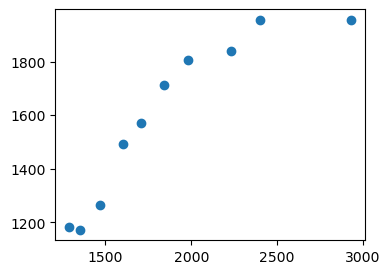

In [6]:
plt.figure(figsize=[4,3])
plt.scatter(df['home_size'],df['kilowatt_hours_per_month'])

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
att = df[['home_size']]
label = df['kilowatt_hours_per_month']

In [9]:
model = LinearRegression()

In [10]:
model.fit(att,label)

LinearRegression()

In [11]:
# Y = a + bX
#Y = label , x = att
a = model.intercept_
b = model.coef_

In [12]:
ans = model.predict(att)

In [13]:
ans

array([1275.92041138, 1308.33867463, 1373.17520113, 1443.4147715 ,
       1502.84825413, 1573.0878245 , 1648.73043875, 1783.80653562,
       1875.6582815 , 2162.01960687])

0.831705383789123

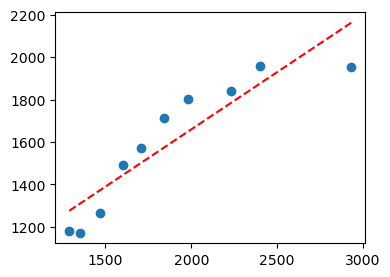

In [14]:
plt.figure(figsize=[4,3])
plt.scatter(df['home_size'],df['kilowatt_hours_per_month'])
plt.plot(att,ans,'r--')
model.score(att,label)

0.9818850241163606

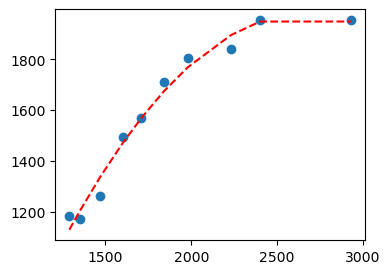

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

df = pd.read_csv('electricity-consumptions.csv')
att = df[['home_size']]
label  = df['kilowatt_hours_per_month']

pf = PolynomialFeatures(degree=2)
pf.fit(att)
att_new = pf.transform(att)

model = LinearRegression()
model.fit(att_new,label)

ans = model.predict(att_new)
plt.figure(figsize=[4,3])
plt.scatter(df['home_size'],df['kilowatt_hours_per_month'])
plt.plot(att['home_size'],ans,'r--')
model.score(att_new,label)


In [16]:
df

,home_size,kilowatt_hours_per_month
0,1290,1182
1,1350,1172
2,1470,1264
3,1600,1493
4,1710,1571
5,1840,1711
6,1980,1804
7,2230,1840
8,2400,1956
9,2930,1954


In [17]:
df.sample(frac = 0.7)

,home_size,kilowatt_hours_per_month
6,1980,1804
3,1600,1493
8,2400,1956
4,1710,1571
2,1470,1264
9,2930,1954
1,1350,1172


In [18]:
basketData = pd.read_excel('MarketBasketOptimization.xlsx',header=None)

In [19]:
basketData.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
dataset = []
for i in range(0,basketData.shape[0]) :
    temp = []
    for j in range(0, basketData.shape[1]) :
        if basketData.loc[i,j] is not np.nan :
            temp.append(basketData.loc[i,j])
            dataset.append(temp)

In [21]:
dataset

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['shrimp',
  'almonds',


In [22]:
basketData.shape[1]

20

In [23]:
from mlxtend.preprocessing import TransactionEncoder

In [24]:
te = TransactionEncoder()

In [25]:
te_ary = te.fit(dataset).transform(dataset)

In [26]:
df = pd.DataFrame(te_ary,columns = te.columns_)

In [27]:
from mlxtend.frequent_patterns import apriori

In [28]:
frequent_itemsets = apriori(df, use_colnames= True , min_support= 0.01)

In [29]:
from mlxtend.frequent_patterns import association_rules

In [30]:
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.3)

In [31]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(almonds),(burgers),0.038722,0.137520,0.011715,0.302551,2.200048,0.006390,1.236620,0.567437
1,(almonds),(chocolate),0.038722,0.238531,0.013963,0.360598,1.511742,0.004727,1.190907,0.352147
2,(almonds),(eggs),0.038722,0.240575,0.012431,0.321020,1.334388,0.003115,1.118480,0.260687
3,(almonds),(milk),0.038722,0.212615,0.012431,0.321020,1.509870,0.004198,1.159660,0.351294
4,(almonds),(mineral water),0.038722,0.353404,0.016517,0.426561,1.207007,0.002833,1.127576,0.178413
...,...,...,...,...,...,...,...,...,...,...
541,"(frozen vegetables, milk, spaghetti)",(mineral water),0.022307,0.353404,0.013282,0.595420,1.684814,0.005399,1.598190,0.415736
542,"(mineral water, spaghetti, ground beef)",(milk),0.038211,0.212615,0.011613,0.303922,1.429449,0.003489,1.131174,0.312366
543,"(mineral water, milk, ground beef)",(spaghetti),0.026053,0.282771,0.011613,0.445752,1.576371,0.004246,1.294057,0.375412
544,"(mineral water, spaghetti, milk)",(ground beef),0.037871,0.168920,0.011613,0.306655,1.815383,0.005216,1.198652,0.466831
